## Introducción 

ES / 

En el competitivo mundo de los gimnasios, mantener a los clientes satisfechos y fidelizados es un factor determinante del éxito. Model Fitness, consciente de este desafío, ha emprendido una iniciativa ambiciosa: aprovechar el poder de los datos analíticos para predecir y prevenir la pérdida de clientes.

Tradicionalmente, medir la pérdida de clientes en un gimnasio se basaba en métricas simples como la cancelación de membresías o la disminución de la frecuencia de visitas. Sin embargo, esta visión es limitada. Muchos clientes se "desvanecen" silenciosamente, sin realizar acciones explícitas de cancelación.

A través del análisis de los perfiles digitales de los clientes de Model Fitness, se pretende desarrollar un modelo predictivo capaz de identificar, con anticipación, a aquellos clientes con mayor probabilidad de abandonar el gimnasio.

EN / 

In the highly competitive world of gyms, keeping customers satisfied and loyal is a critical factor for success. Recognizing this challenge, Model Fitness has embarked on an ambitious initiative: leveraging the power of data analytics to predict and prevent customer churn.

Traditionally, measuring customer churn in a gym relied on simple metrics such as membership cancellations or decreased visit frequency. However, this view is limited. Many customers "fade away" silently, without taking explicit cancellation actions.

By analyzing the digital profiles of Model Fitness customers, we aim to develop a predictive model capable of identifying, in advance, those customers most likely to leave the gym.

## Objetivo 

ES /

El objetivo principal de este proyecto es desarrollar una estrategia de retención de clientes altamente efectiva para Model Fitness para contar con una herramienta valiosa para optimizar su estrategia de marketing y mejorar la experiencia del cliente, lo que se traducirá en una mayor retención y un crecimiento sostenible del negocio.

EN / 

Our primary objective is to develop a data-driven customer retention strategy for Model Fitness. Through this project, we aim to provide the company with a valuable tool to analyze customer behavior, optimize marketing efforts, and improve the overall customer experience, leading to increased customer retention and sustainable business growth.

## Carga y procesamiento de datos 

In [1]:
# Carga de librerías 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Carga de documento
df = pd.read_csv(r"C:\Users\ibtjl\OneDrive\Documentos\GitHub\Gym_churn_prediction\gym_churn_us.csv")

# Cambio en el estilo de nombres de columnas
new_col_names = [name.strip().lower().replace(' ', '_') for name in df.columns]
df.columns = new_col_names

# Cambio de tipo de dato de la columna 'month_to_end_contract'
df['month_to_end_contract'] = df['month_to_end_contract'].astype(int)

# Mostrar información básica por pantalla
print(df.info())
print()
print("Cantidad de duplicados: {} ".format(df.duplicated().sum()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int32  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

**Se tienen 4,000 registros. No hay recuente de valores nulos y no se tienen duplicados explicitos.**

In [3]:
# Verificación de los datos que contiene cada columna
columns = df.columns

for col in columns:
    print(df[col].sample(5))

499     1
2300    1
3776    1
2135    1
3317    1
Name: gender, dtype: int64
1581    1
2472    1
2624    1
2156    1
47      1
Name: near_location, dtype: int64
2278    0
1225    0
3873    0
1678    0
1266    0
Name: partner, dtype: int64
3459    0
2616    0
867     0
3026    0
1094    0
Name: promo_friends, dtype: int64
2773    1
797     1
1571    1
1972    1
1198    1
Name: phone, dtype: int64
3315     1
997      1
3557    12
1147     1
161      1
Name: contract_period, dtype: int64
2306    0
2996    1
1718    1
1414    0
3024    0
Name: group_visits, dtype: int64
1883    28
142     29
3273    31
1081    27
3948    29
Name: age, dtype: int64
563     144.821993
3564    210.299213
826     212.544454
2342    442.976355
3480    181.499506
Name: avg_additional_charges_total, dtype: float64
402     1
999     9
2643    1
2343    1
3830    1
Name: month_to_end_contract, dtype: int32
3809    0
954     4
2299    4
1533    5
3060    2
Name: lifetime, dtype: int64
838     1.478379
3864    2.2390

## Procesamiento de datos

In [4]:
# Descripción de los datos excluyendo columnas con datos binarios
df[['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']].describe()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

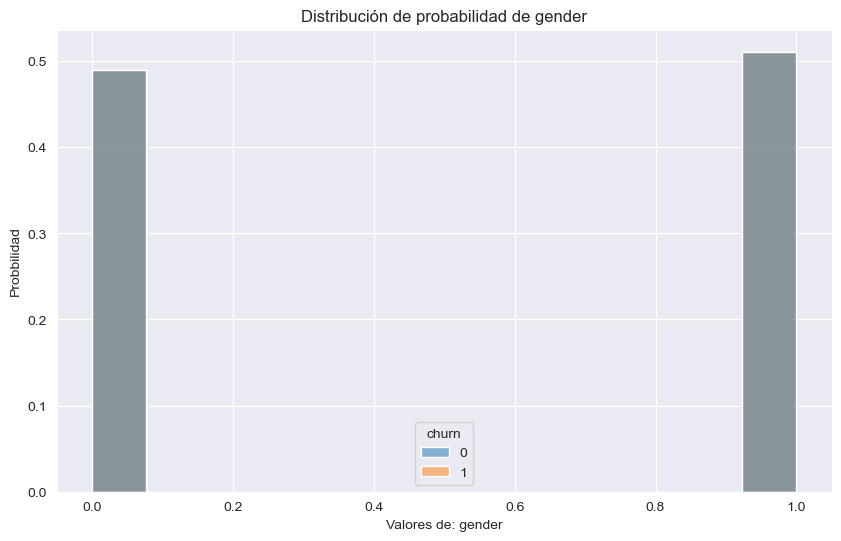

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

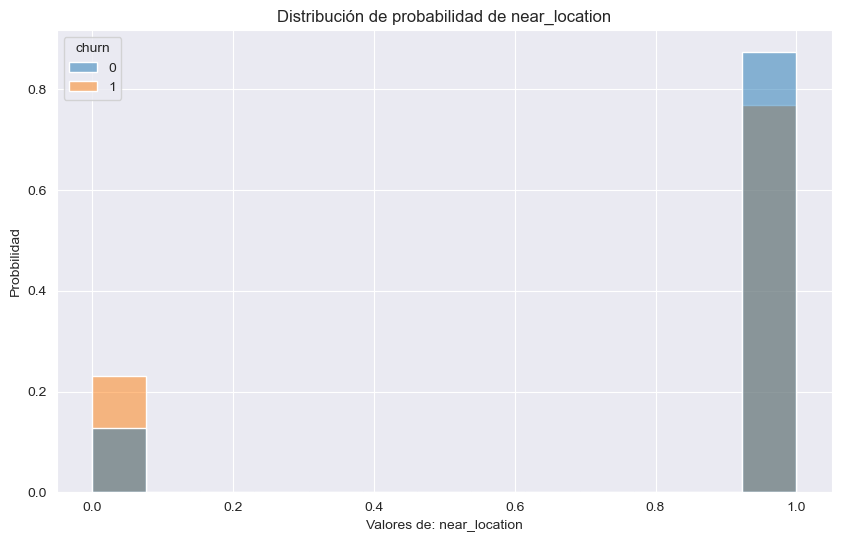

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

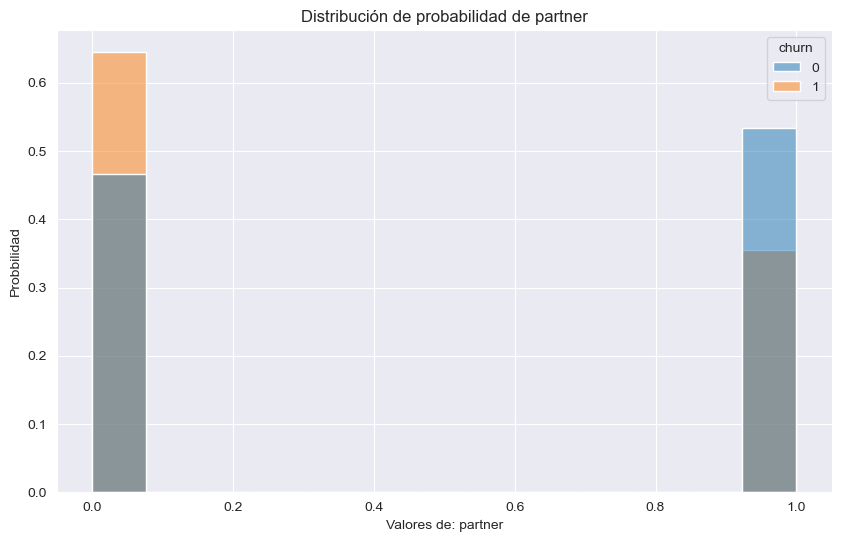

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

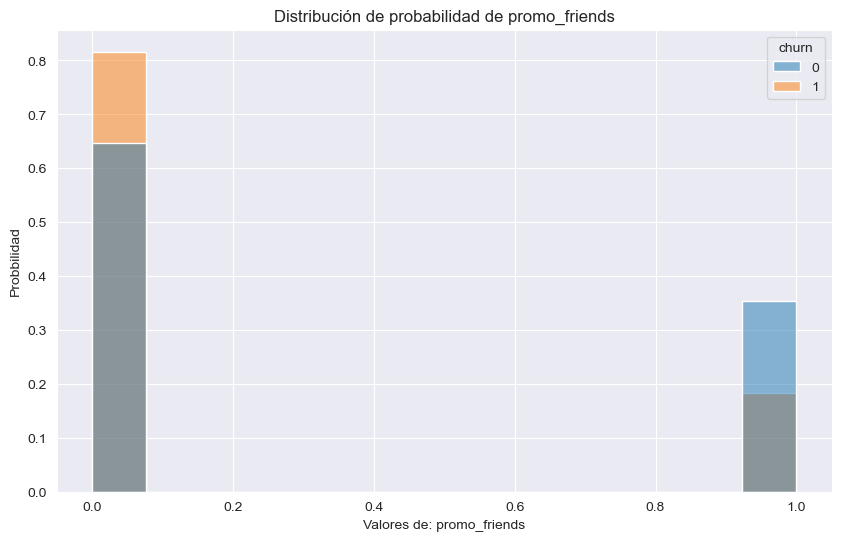

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

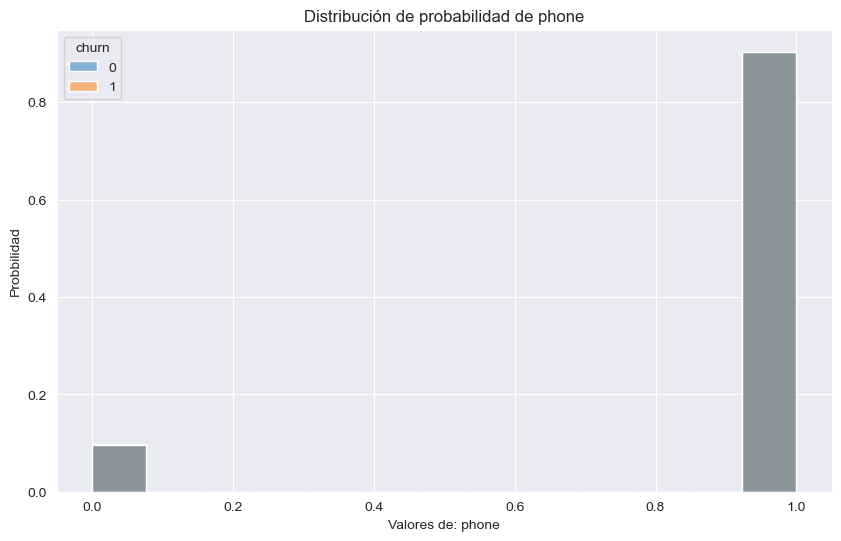

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

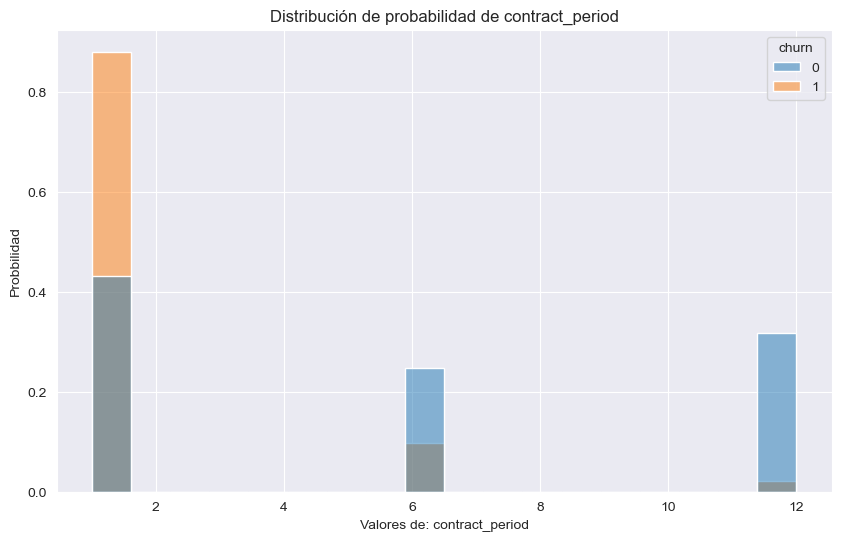

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

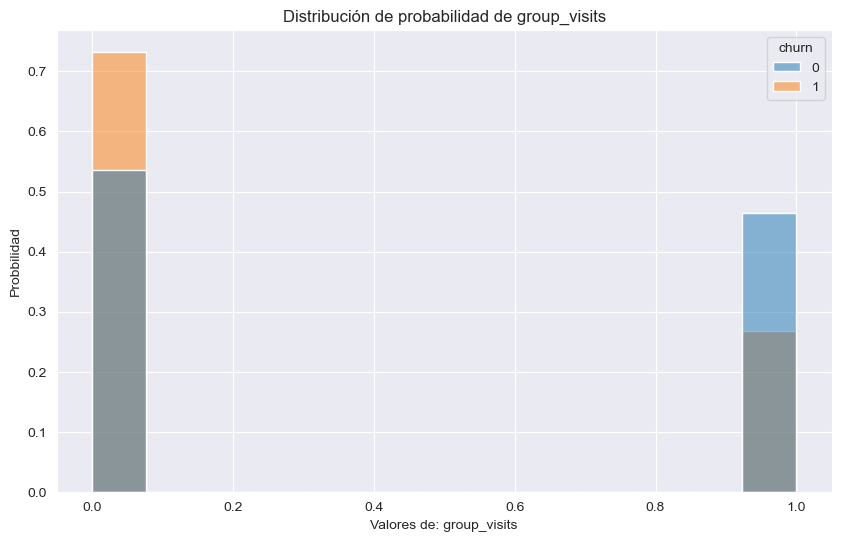

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

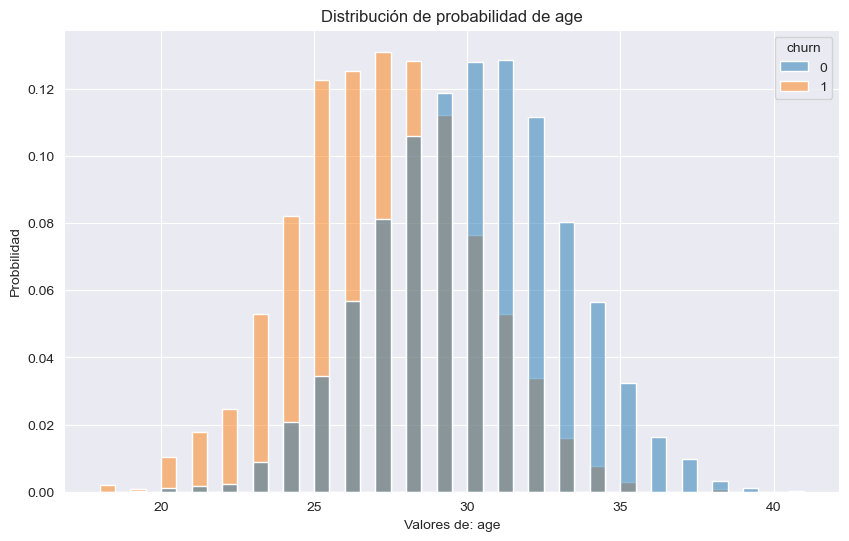

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

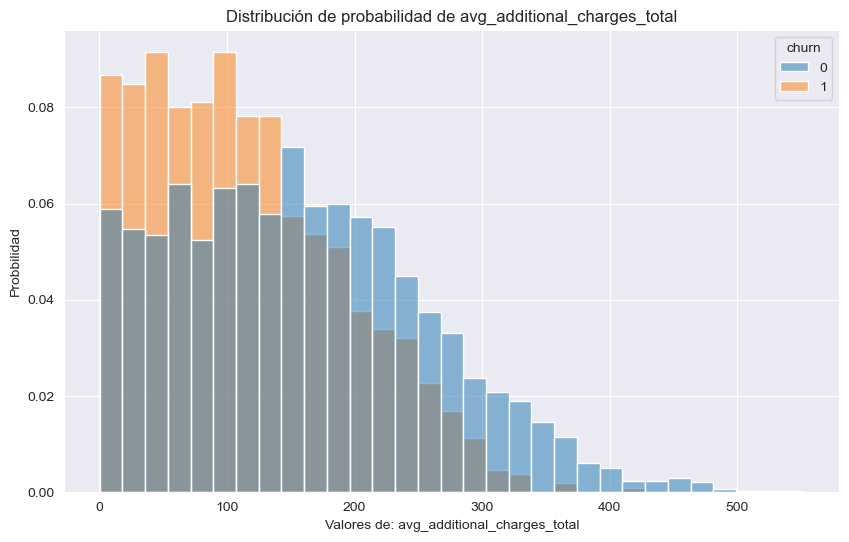

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

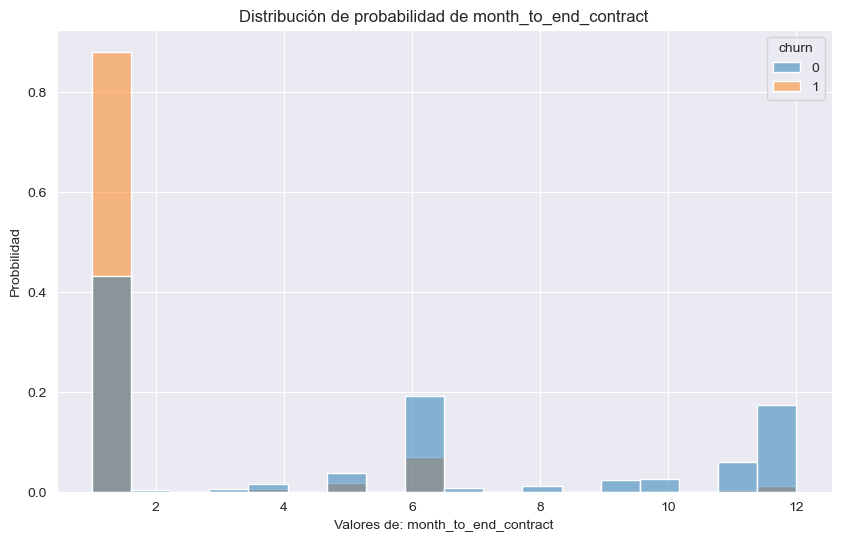

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

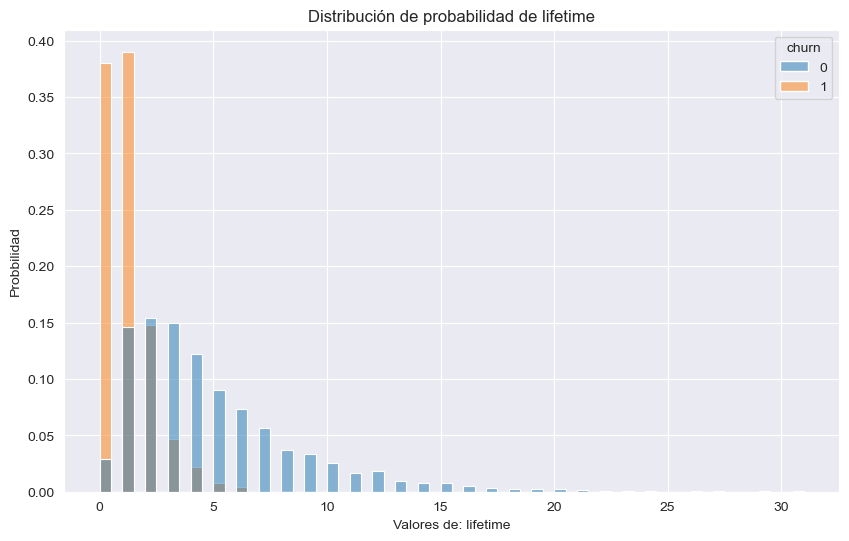

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

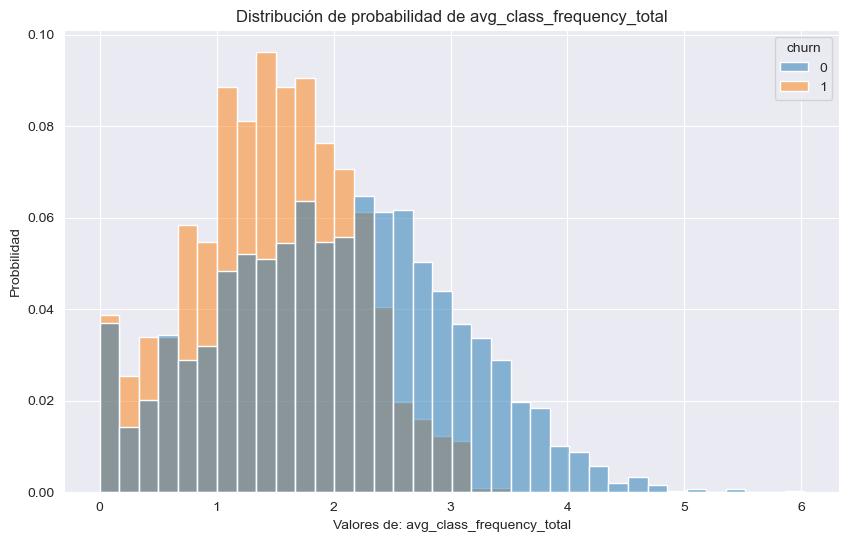

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

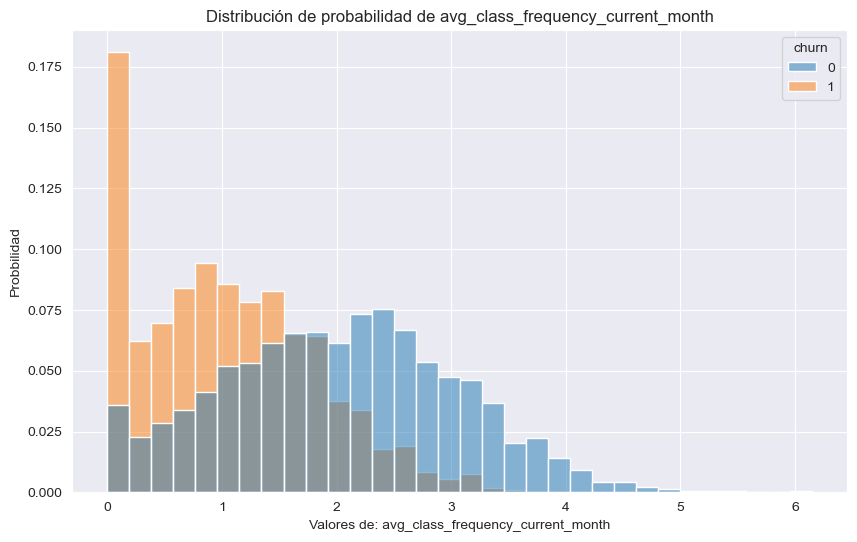

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

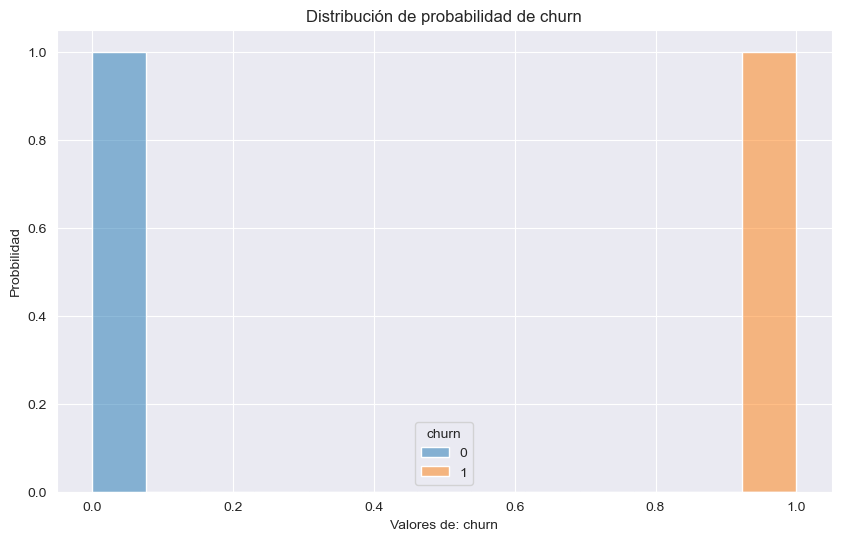

In [19]:
#Gráficos de histograma para cada columna
data_cols = df.columns

for col in data_cols:
    sns.set_style(style='darkgrid')
    plt.figure(figsize = (10,6))
    sns.histplot(data = df, x = col, ax=plt.gca(), hue='churn',  stat='probability', common_norm=False)
    plt.title(f'Distribución de probabilidad de {col}')
    plt.xlabel(f'Valores de: {col}')
    plt.ylabel('Probbilidad')
    plt.show()

In [6]:
# Observación de datos para agrupación por cancelación 

# filtrado para usuarios que no cancelaron 
df_churn0 = df.query('churn == 0')
# filtrado para usuarios que cancelaron 
df_churn1 = df.query('churn == 1')

In [7]:
# Comparación de los datos para df filtrado por 'churn'
df_churn0[['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']].describe()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000
mean,5.747193,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
std,4.716942,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994
min,1.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000
25%,1.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021
50%,6.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697
75%,12.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


In [8]:
df_churn1[['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']].describe()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000
mean,1.728558,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546
std,2.132371,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337
50%,1.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445
75%,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576
max,12.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271


In [9]:
# Proporción de usuarios en churn0 y churn1 en el dataset

churn_0 = np.round((len(df_churn0) / len(df)) * 100, 2)
churn_1 = np.round((len(df_churn1) / len(df)) * 100, 2)

print(f'Porcentaje de usuarios que no cancelaron = {churn_0}')
print(f'Proporción de usuarios que cancelaron = {churn_1}')

Porcentaje de usuarios que no cancelaron = 73.47
Proporción de usuarios que cancelaron = 26.52


Al comparar ambos grupos, se observan patrones interesantes. Los usuarios que no cancelaron (churn0, 73.47% de los datos en el dataset) presentan una mayor antigüedad en la plataforma, un gasto promedio más elevado en servicios adicionales y una duración de contrato remanente significativamente mayor. Esto sugiere una mayor fidelidad y compromiso con el servicio. Por otro lado, los usuarios que sí cancelaron (churn1, 26.52% de los datos en el dataset) exhiben una menor antigüedad, un gasto promedio inferior y una duración de contrato más corta, indicando una menor satisfacción o intención de continuar. Aunque la frecuencia de clases parece ser mayor en el grupo churn1, se requiere un análisis más profundo para determinar si esta correlación es causal o si se debe a otros factores. Estos hallazgos iniciales sugieren que estrategias enfocadas en recompensar la lealtad, incentivar gastos adicionales y ofrecer planes de suscripción más atractivos podrían ayudar a reducir la tasa de cancelación. 

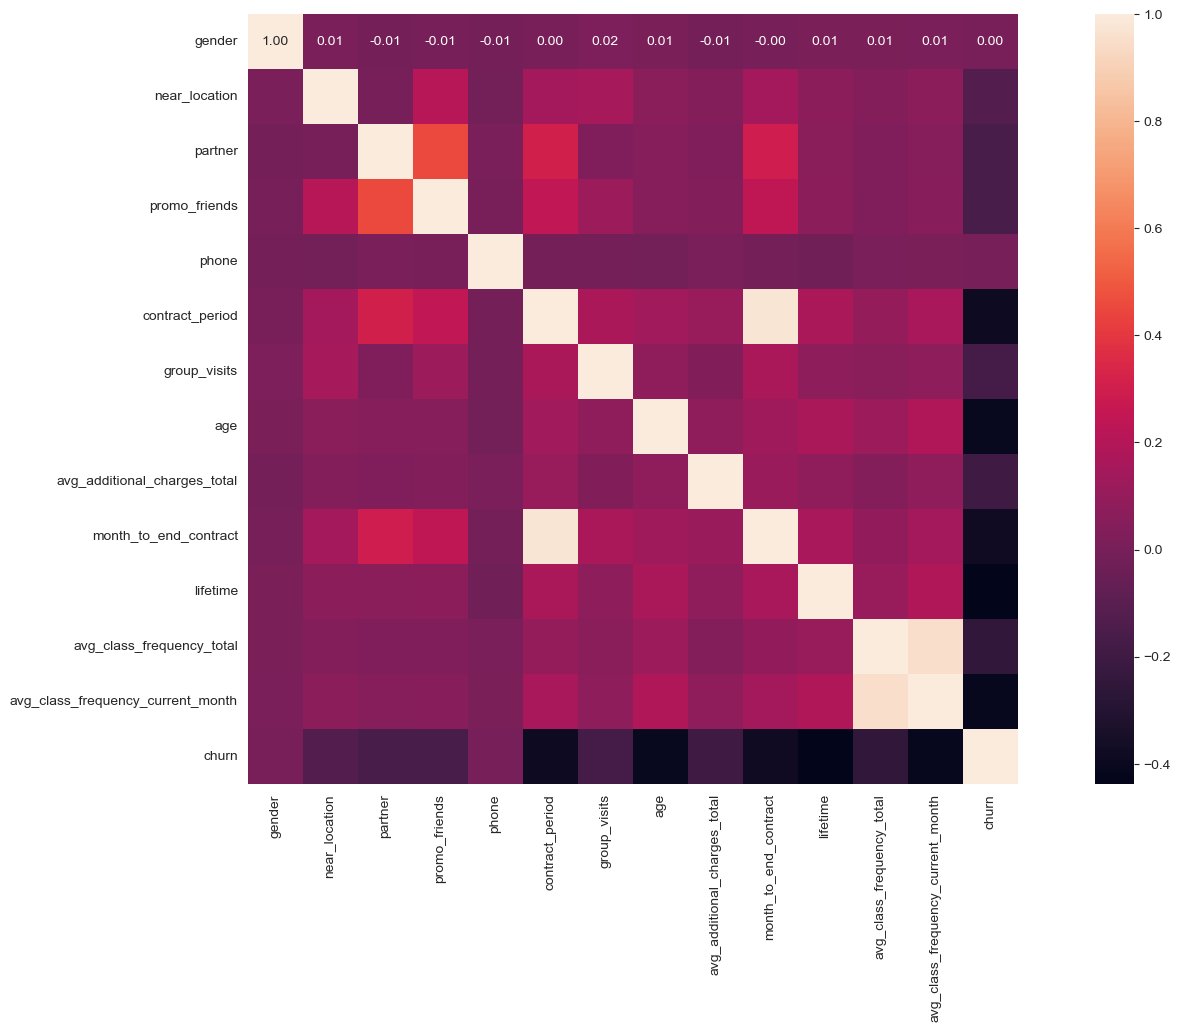

In [10]:
# Matriz de correlación como mapa de calor 
corr_m = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_m, annot=True, square=True, fmt='.2f', annot_kws={"size": 10})
plt.show()

¿Qué características están corelacionadas (de forma positiva o negativa) con la variable churn

In [11]:
# Matriz de correlación 
corr_m

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


In [12]:
# Selección de los pares de variables con mayor correlación
def get_high_correlation_pairs(corr_matrix, threshold=0.8):
    """
    Esta funcíon encuentra los pares de valores que tienen una correlación mayor al umbral especificado.

    Paramter: corr_matrix, dataset con la matriz de correlación.
    Parameter: threshold, valor de umbral de correlación.

    Returns: lista de tuplas con los pares de valores con alta correlación.
    """
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    
    return high_corr_pairs


high_corr_pairs = get_high_correlation_pairs(corr_m)


for pair in high_corr_pairs:
    print(f"{pair[0]} y {pair[1]}: {pair[2]:.2f}")


contract_period y month_to_end_contract: 0.97
avg_class_frequency_total y avg_class_frequency_current_month: 0.95


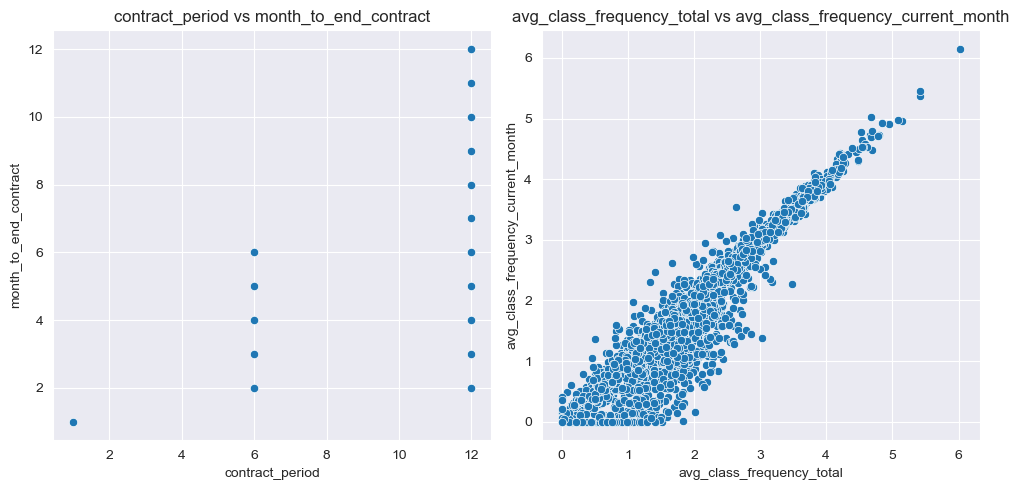

In [13]:
# Gráficos de dispersión para los pares de características con correlación más alta 

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Primer gráfico de dispersión
axs[0].set_title("contract_period vs month_to_end_contract")
sns.scatterplot(data=df, x='contract_period', y='month_to_end_contract', ax=axs[0])

# Segundo gráfico de dispersión
axs[1].set_title("avg_class_frequency_total vs avg_class_frequency_current_month")
sns.scatterplot(data=df, x='avg_class_frequency_total', y='avg_class_frequency_current_month', ax=axs[1])

plt.tight_layout()
plt.show()

Los pares (contract_period / month_to_end_contract) y (avg_class_frequency_total / avg_class_frequency_current_month), son los que tienen los valoers de correlación más altos. 

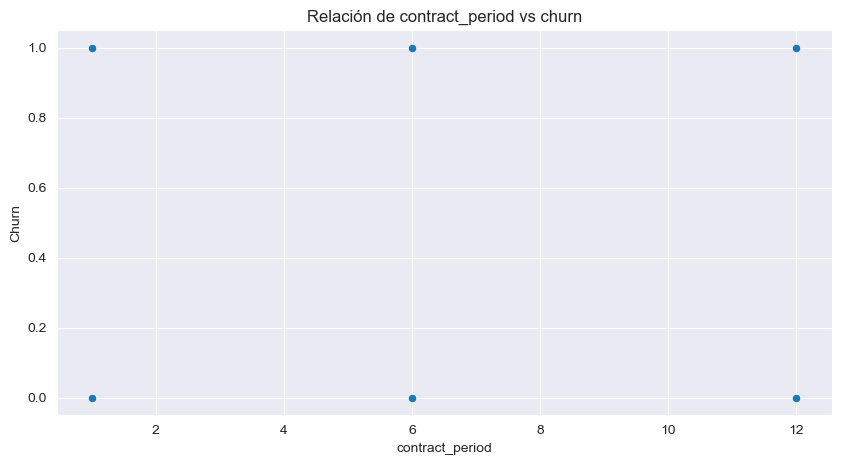

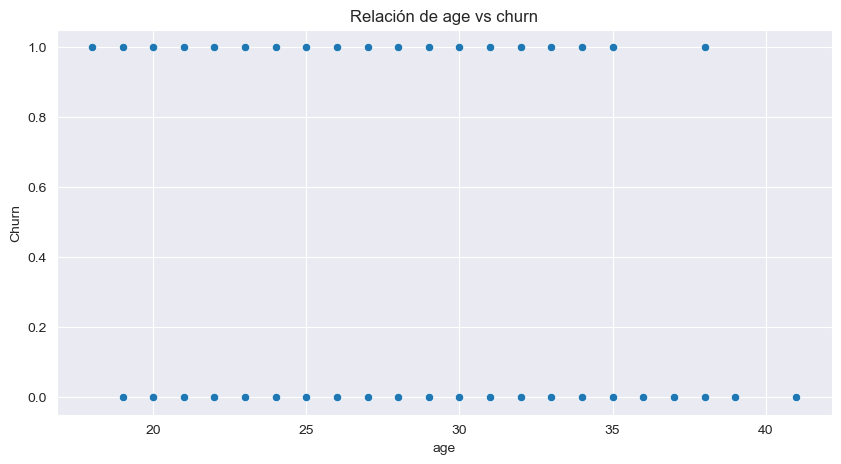

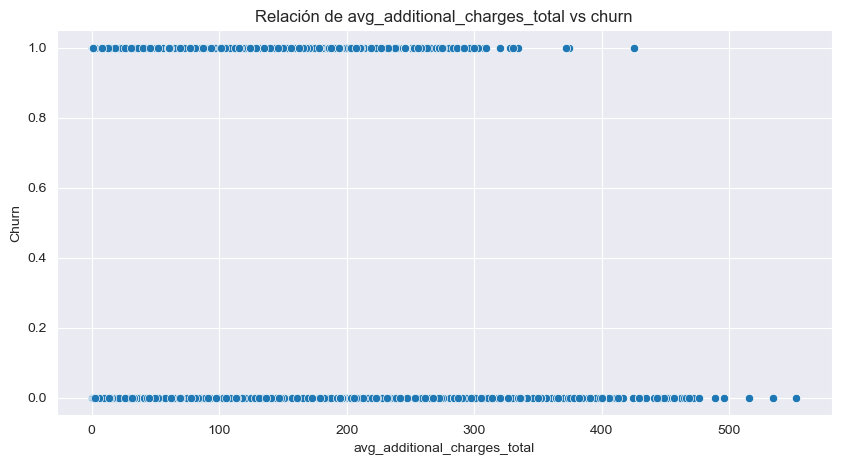

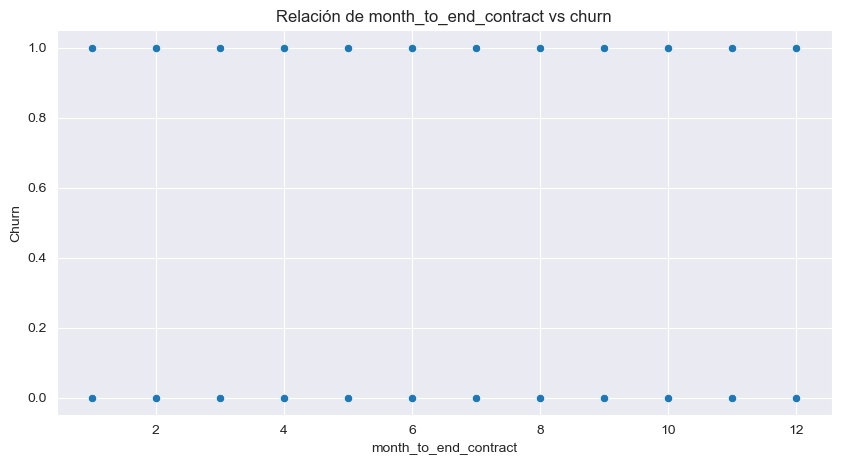

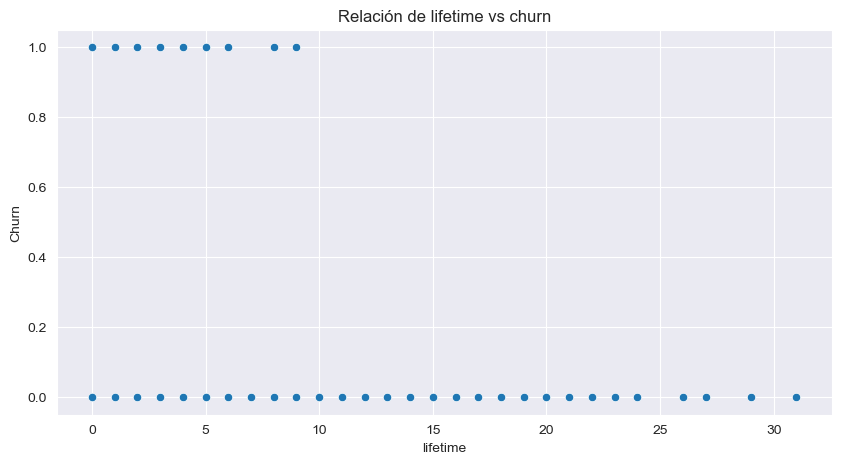

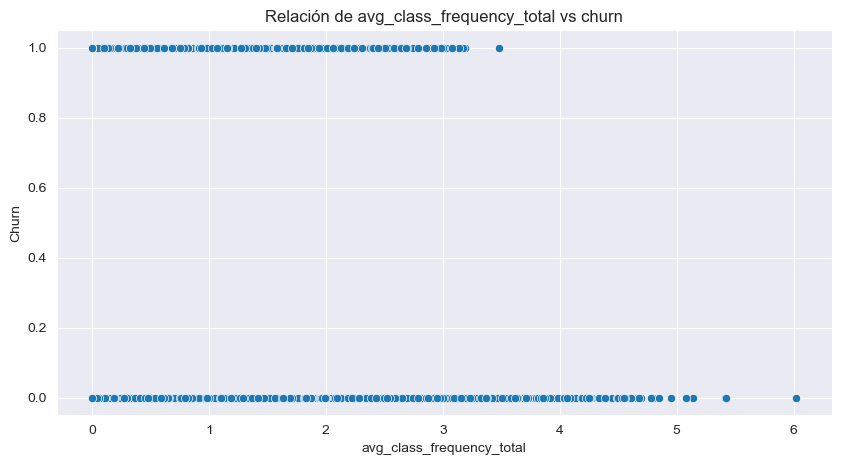

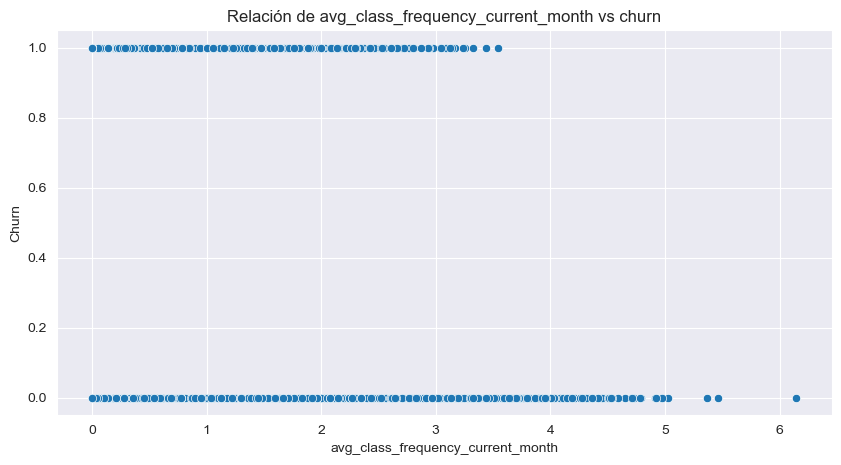

In [15]:
# Diagramas de distribución pareados para usuarios que cancelaron (churn = 1) y usuarios que no cancelaron (churn = 0)

c_list= ['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']

for col in c_list:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=df[col], y=df['churn'])
    plt.xlabel(col)
    plt.ylabel('Churn')
    plt.title(f'Relación de {col} vs churn')
    plt.show()

## Modelo para predecir la cancelación de usuarios